<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value</li>
<li>Select is it classification or regression problem</li>
<li>Build basic model (KNN/Logistic Regression/Linear Regression) depending on the problem</li>
<li>Build Decision Tree model</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd


In [40]:
df = pd.read_csv('/content/drive/MyDrive/bestsellers with categories.csv')

In [41]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [42]:
import seaborn as snb


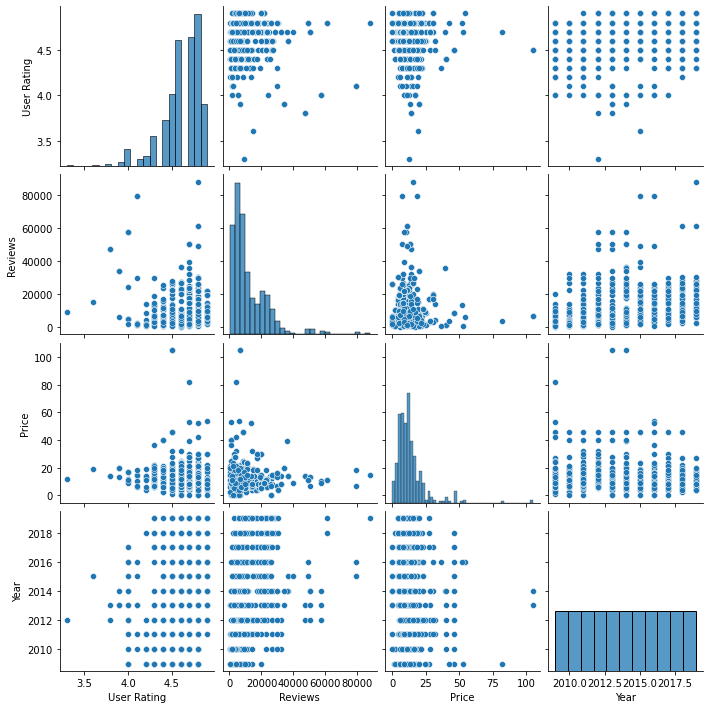

In [43]:
snb.pairplot(df) 

In [44]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [45]:
#encoding na tabelata Genre
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder()

In [47]:
df['Genre'] = encoder.fit_transform(df['Genre'].to_numpy().reshape(-1, 1)).toarray()

In [48]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0.0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1.0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0.0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1.0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0.0


In [49]:
# enkodiranje na tabelite name & author
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

In [50]:
df['Name'] = labelenc.fit_transform(df['Name'])


In [51]:
df['Author'] = labelenc.fit_transform(df['Author'])

In [52]:
 df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,0,114,4.7,17350,8,2016,0.0
1,1,219,4.6,2052,22,2011,1.0
2,2,134,4.7,18979,15,2018,0.0
3,3,95,4.7,21424,6,2017,1.0
4,4,174,4.8,7665,12,2019,0.0
...,...,...,...,...,...,...,...
545,349,120,4.9,9413,8,2019,1.0
546,350,121,4.7,14331,8,2016,0.0
547,350,121,4.7,14331,8,2017,0.0
548,350,121,4.7,14331,8,2018,0.0


In [53]:
y = df['Genre']
x= df.drop('Genre', axis=1)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,  y, test_size=0.2)
     

In [55]:
# skaliranje - dali e potrebno

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [56]:
X_train

array([[ 0.55328583,  0.05185142, -0.97630993, -1.02408428, -0.2115536 ,
        -1.22586079],
       [ 1.69485945,  0.1511071 , -0.53481315, -0.08998652,  0.13544951,
        -0.59976822],
       [-1.54305846,  1.31381645, -0.09331637, -0.17968525, -0.03805205,
        -1.53890708],
       ...,
       [ 0.89575791,  0.34961845, -0.53481315,  0.98540258, -0.2115536 ,
         0.65241692],
       [ 1.34200942, -0.65711769,  1.23117398, -0.26359112, -0.29830438,
         0.9654632 ],
       [-0.48450838, -1.15339607, -0.09331637, -0.58427992,  0.56920339,
        -0.91281451]])

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
# fituvaj go modelot
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [58]:
#predviduvanje
Y_pred = knn.predict(X_test) 
X_train, X_test, Y_train, Y_test = train_test_split(x,  y, test_size=0.2)


In [59]:

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import metrics


In [60]:
print(classification_report(Y_test, Y_pred))
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


              precision    recall  f1-score   support

         0.0       0.52      0.58      0.55        59
         1.0       0.44      0.39      0.42        51

    accuracy                           0.49       110
   macro avg       0.48      0.48      0.48       110
weighted avg       0.49      0.49      0.49       110

Accuracy: 0.4909090909090909


In [61]:
from sklearn.tree import DecisionTreeClassifier

classifier =DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train,Y_train)

y_pred = classifier.predict(X_test)

In [62]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.6818181818181818


In [63]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


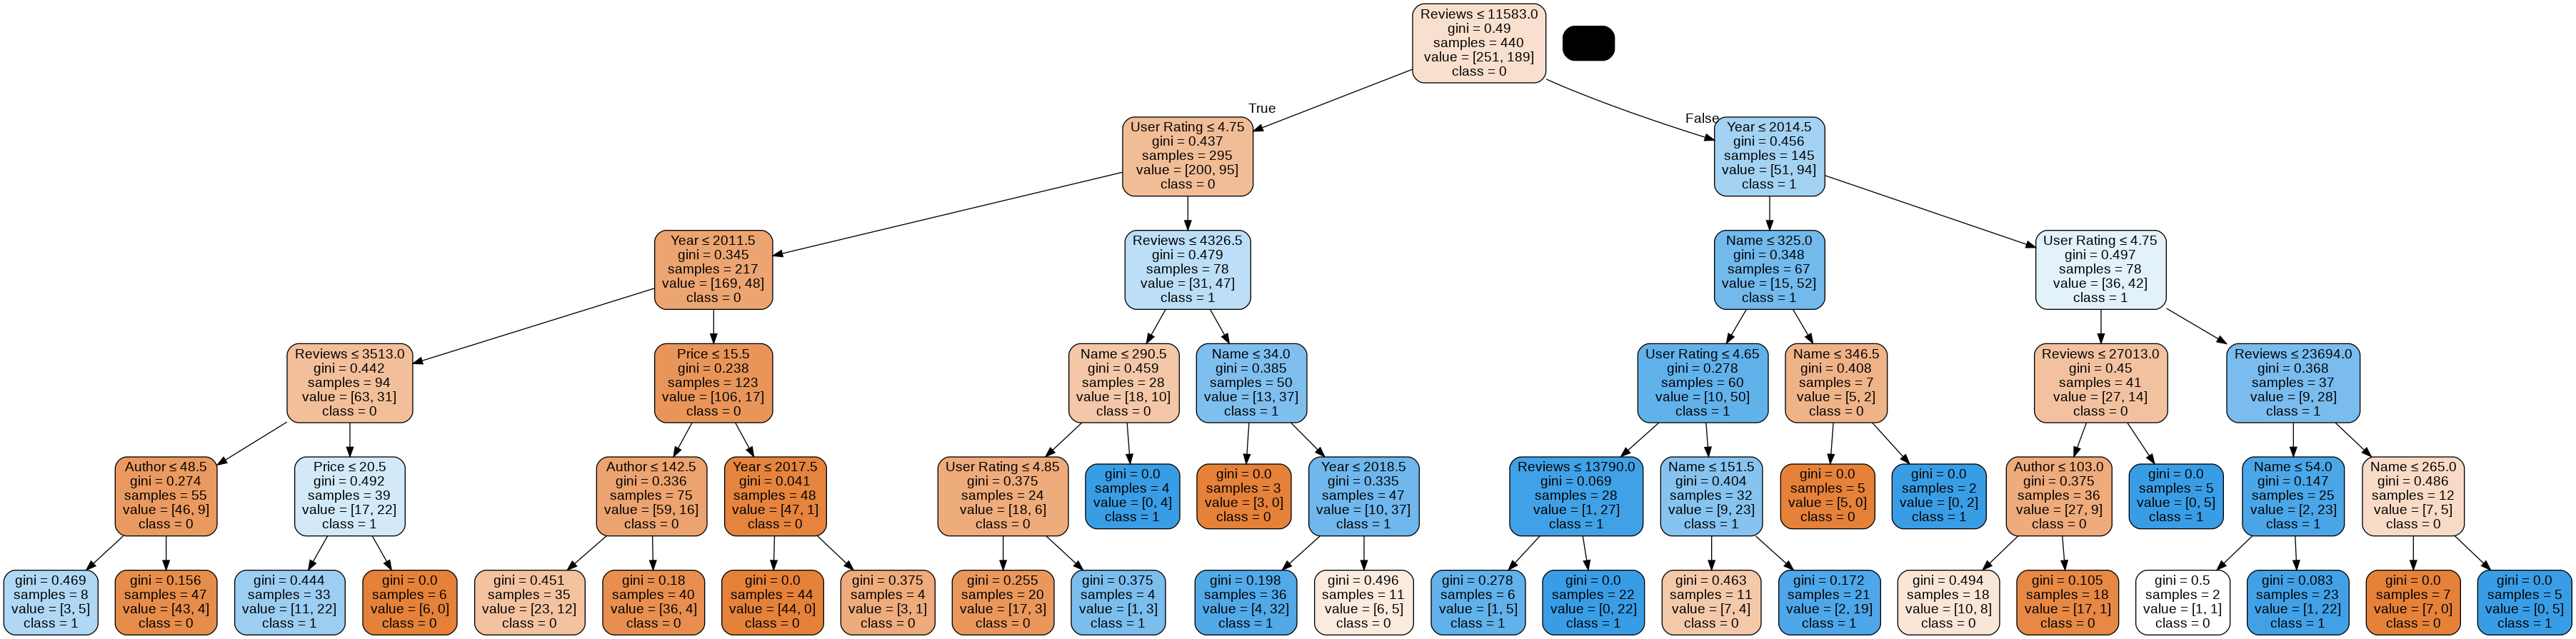

In [64]:

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns[:-1],class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [65]:
#Note: We can optimize the performance using the entropy as criteria.
classifier_opt = DecisionTreeClassifier(criterion="entropy", max_depth=10)

classifier_opt = classifier_opt.fit(X_train,Y_train)
y_pred = classifier_opt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7727272727272727
